In [1]:
import sys
import os
import talib 

# Go two levels up: from 'notebooks/task1/' to the project root
sys.path.append(os.path.abspath(os.path.join('..', '..')))

In [2]:
import yfinance as yf

# Download DAL data from 2018-01-01 to 2025-04-30
df_DAL = yf.download(
    "DAL", 
    " 2009-09-10", 
    end="2020-06-10"   # end date is exclusive, so use 2025-05-01 for up to April 30
)

# Reset index to make 'Date' a column
df_DAL.reset_index(inplace=True)



YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['DAL']: ValueError("time data ' 2009-09-10' does not match format '%Y-%m-%d'")


In [3]:



# Save the DataFrame as a CSV file in the correct folder
df_DAL.to_csv(r"C:\Users\ABC\Desktop\10Acadamy\week1\analysis-of-financial-news-data\data\yfinance_data\DAL_historical_data.csv", index=False)


In [4]:
print("Null values count per column:")
print(df_DAL.isnull().sum())


Null values count per column:
Price      Ticker
Date                 0
Adj Close  DAL       0
Close      DAL       0
High       DAL       0
Low        DAL       0
Open       DAL       0
Volume     DAL       0
dtype: int64


In [5]:
df_DAL.describe()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,DAL,DAL,DAL,DAL,DAL,DAL
count,0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaT,NaN,NaN,NaN,NaN,NaN,NaN
min,NaT,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaT,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaT,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaT,NaN,NaN,NaN,NaN,NaN,NaN
max,NaT,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import matplotlib.pyplot as plt
from src.visualization import get_rolling_series

plt.figure(figsize=(16, 6))

for col in ['Open', 'High', 'Low', 'Close']:
    rolling_series = get_rolling_series(df_DAL, value_col=col, window=7)
    plt.plot(
        rolling_series.index, 
        rolling_series.values, 
        label=f"{col.title()} (7-day avg)"
    )

plt.title("DAL Price Series: 7-day Rolling Average", fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend()
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'src.visDALization'

In [ ]:
print(df_DAL.columns)
print(df_DAL.columns[df_DAL.columns.duplicated()])
print(type(df_DAL['Close']))  # Should be Series, not DataFrame!



MultiIndex([(  'Date',    ''),
            ( 'Close', 'UAL'),
            (  'High', 'UAL'),
            (   'Low', 'UAL'),
            (  'Open', 'UAL'),
            ('Volume', 'UAL')],
           names=['Price', 'Ticker'])
MultiIndex([], names=['Price', 'Ticker'])
<class 'pandas.core.frame.DataFrame'>


In [ ]:
df_DAL.columns = ['_'.join([str(c) for c in col if c]) for col in df_DAL.columns.values]
# Now 'Close_DAL', 'High_DAL', ...


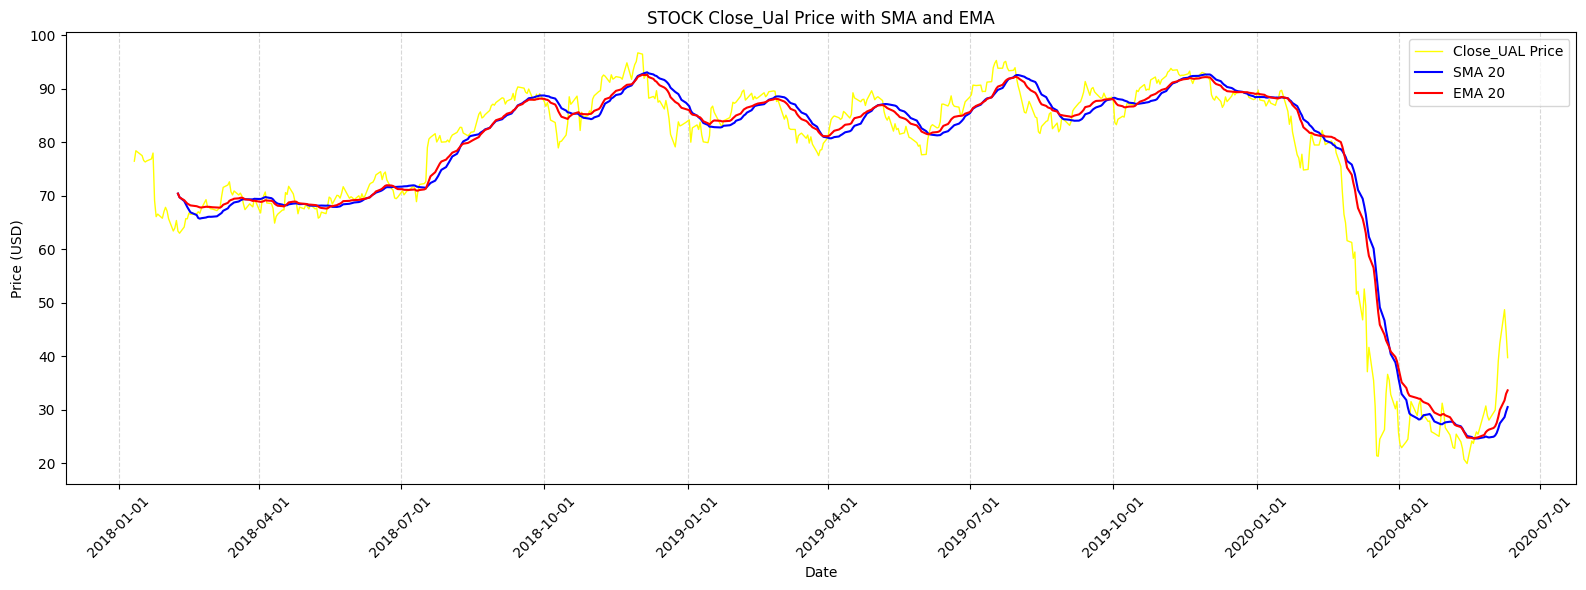

In [ ]:
from src.plot_ma import plot_ma
plot_ma(df_DAL, 'Close_DAL')

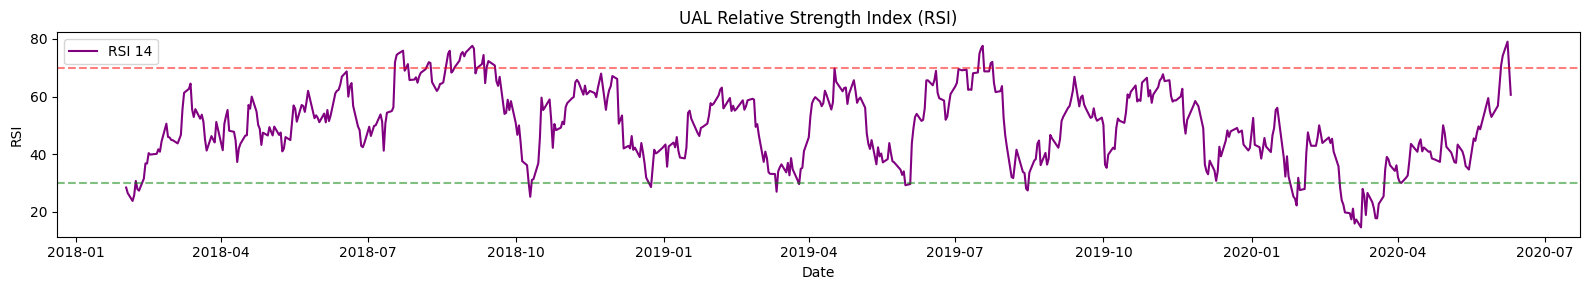

In [ ]:
from src.plot_rsi import plot_rsi

# For Apple, using Close price:
plot_rsi(df_DAL, price_col='Close_DAL', ticker_name='DAL')

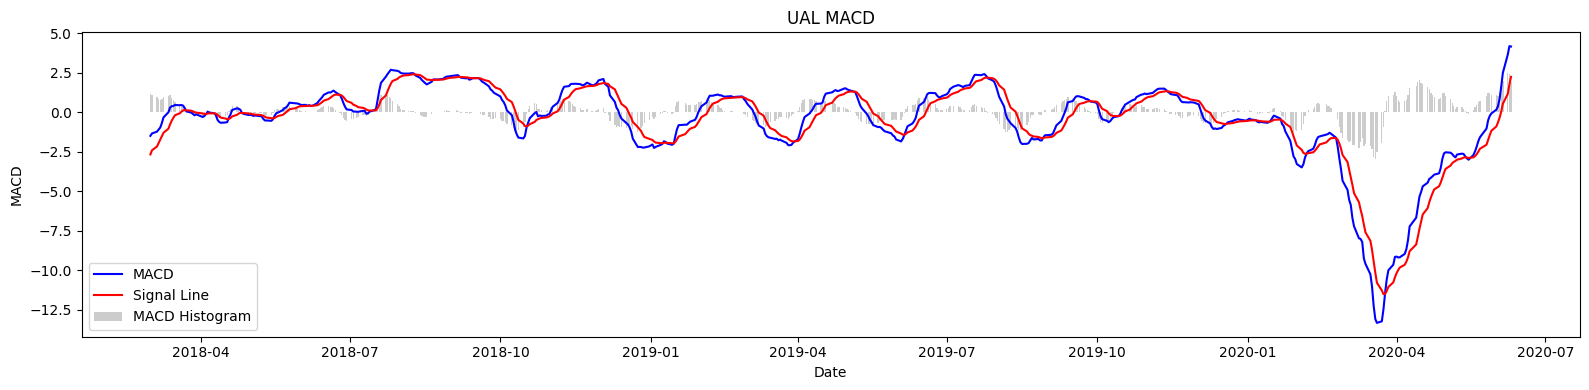

In [ ]:
from src.plot_macd import plot_macd

# For Apple with Close price
plot_macd(df_DAL, price_col='Close_DAL', ticker_name='DAL')